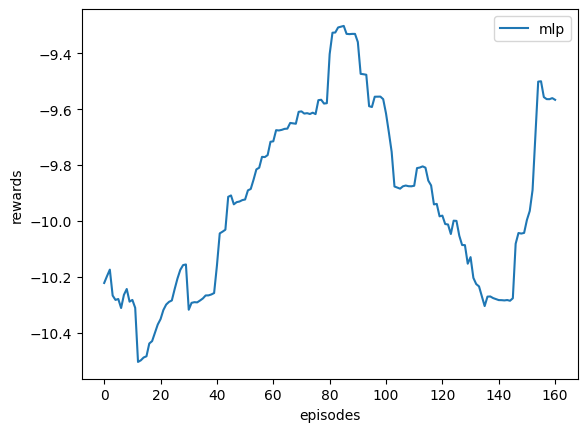

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path
import csv
import numpy as np
import os
import yaml
import pickle

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plotting_dir = Path().resolve()
config_dir = plotting_dir / "ppo_config.yaml"

with open(config_dir, "r") as file:
    config = yaml.safe_load(file)

moving_avg_window_size = config["moving_avg_window_size"]
n = 4
data = []

batch = "buzz_wire_standard"
experiments = ["mlp"]

for experiment in experiments:
    checkpoint_path = f"/home/magraz/research/src/learning/experiments/results/{batch}/{experiment}/trial_1/models/data.dat"

    with open(checkpoint_path, "rb") as handle:
        data.append(pickle.load(handle)[:2000])

fig = plt.figure()
ax = fig.add_subplot(111)

for i, exp in enumerate(experiments):
    rewards_moving_avg = moving_average(data[i], moving_avg_window_size)
    ax.plot(rewards_moving_avg, label=exp)

ax.legend()
ax.set_xlabel("episodes")
ax.set_ylabel("rewards")

plt.show()
